# DS and ML

In [951]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

In [952]:
## classification ml:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [992]:
## regression ml
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree.export import export_text
from sklearn.neighbors import KNeighborsRegressor

In [954]:
### evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [955]:
### optimize model
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, FastICA

In [998]:
ds = pd.read_csv('./data/politic_satisfaction_cleaned.csv', index_col=0)

# 1. Data Exploration

## 2.1. Descriptive Statistics

In [957]:
ds.head()

,PB030: PERSONAL ID,PB020: COUNTRY,PB010: YEAR OF THE SURVEY,PB140: YEAR OF BIRTH,PB150: SEX,PB190: MARITAL STATUS,PB200: CONSENSUAL UNION,PB220A: CITIZENSHIP,PE010: CURRENT EDUCATION ACTIVITY,PE040: HIGHEST ISCED LEVEL ATTAINED,...,PY120G: SICKNESS BENEFITS,PY130G: DISABILITY BENEFITS,PY140G: EDUCATION-RELATED ALLOWANCES,PD020: Replace worn-out clothes by some new (not second-hand) ones,PD030: Two pairs of properly fitting shoes,PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month,PD060: Regularly participate in a leisure activity,PD070: Spend a small amount of money each week on yourself,PD080: Internet connection for personal use at home,PW130: TRUST IN THE POLITICAL SYSTEM
0,35601,DE,2013,1977,1,2.0,3,0,2,3.0,...,0.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0
1,44701,DE,2013,1936,1,2.0,1,0,2,2.0,...,0.0,0.0,0.0,2.0,3.0,1.0,1.0,1.0,1.0,7.0
2,59901,DE,2013,1952,2,2.0,3,0,1,5.0,...,0.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0
3,71101,DE,2013,1938,2,2.0,3,0,2,2.0,...,0.0,0.0,0.0,3.0,1.0,1.0,3.0,1.0,1.0,5.0
4,79501,DE,2013,1950,2,5.0,3,0,2,3.0,...,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,3.0,0.0


In [958]:
ds.columns

Index(['PB030: PERSONAL ID', 'PB020: COUNTRY', 'PB010: YEAR OF THE SURVEY',
       'PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
       'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G++: SOCIAL 

In [959]:
ds.dtypes

PB030: PERSONAL ID                                                                              int64
PB020: COUNTRY                                                                                 object
PB010: YEAR OF THE SURVEY                                                                       int64
PB140: YEAR OF BIRTH                                                                            int64
PB150: SEX                                                                                      int64
PB190: MARITAL STATUS                                                                         float64
PB200: CONSENSUAL UNION                                                                         int64
PB220A: CITIZENSHIP                                                                             int64
PE010: CURRENT EDUCATION ACTIVITY                                                               int64
PE040: HIGHEST ISCED LEVEL ATTAINED                                               

In [960]:
# should i change float to int? at the moment i dont care if they are floats or int

In [961]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(ds, title='Pandas Profiling Report')

#profile.to_notebook_iframe()


##### conclusion
per column
- PB010 YEAR_of Survey: singel value, only needed, if i add more datas --> drop colum
- PB020 COUntry: same as with year--> drop column
- PB150_sex: almost equally balanced
- PH...healt: a lot of 8 = "dont know" --> test to drop them? or to change to other value?s


overall: 
- a lot of imbalanced data --> check later if balancing needed
- a lot of categorical data, but not all within the same range  --> try to use different scaler later
- some categorical data have a meaning (1-10), where 10 is better. other like "self defined curent status" / "occupation": no meaning
- a lot of skeewed datas, because either 0 or a value --> use other scaler?
- correlation --> pca/ica

In [999]:
ds1 = ds.drop('PB010: YEAR OF THE SURVEY', axis=1)

In [1000]:
ds1 = ds.drop('PB020: COUNTRY', axis=1)

### 2.2. Correlation 

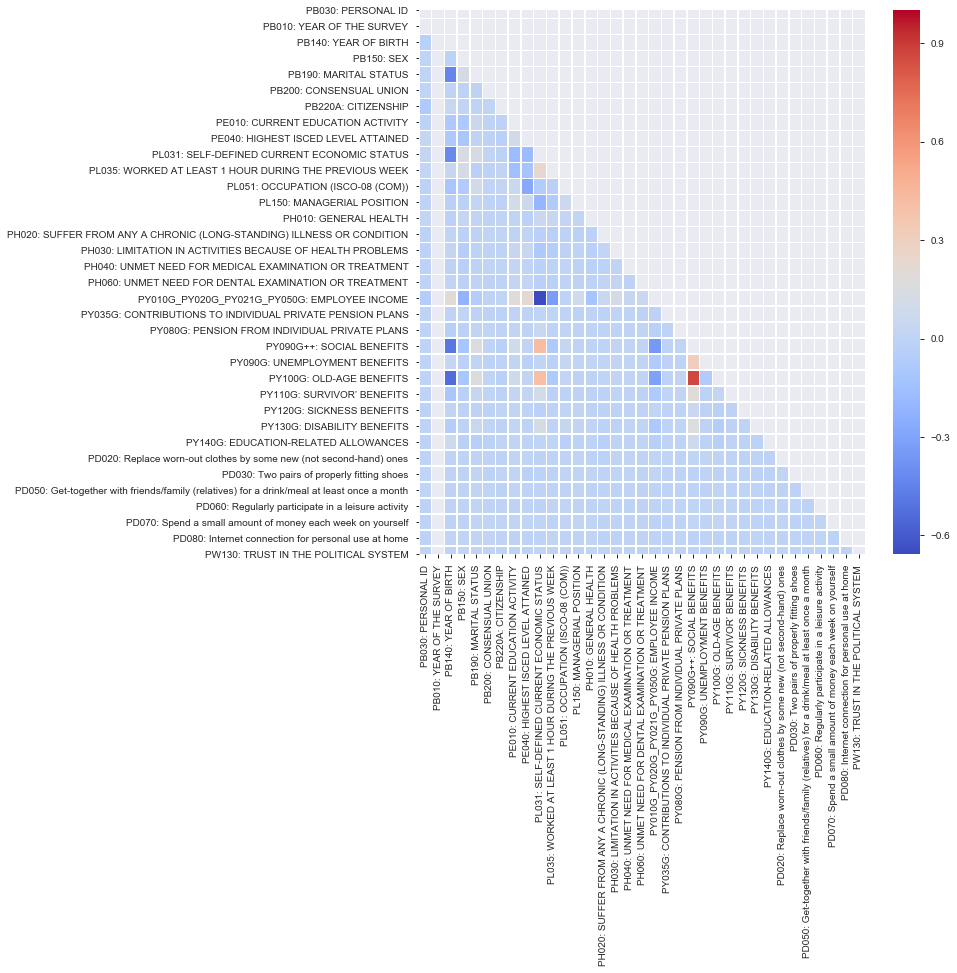

In [1001]:
plt.figure(figsize =(10,10))
corr = ds.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = False, linewidth=0.5, mask=mask)

In [1002]:
"""
Problems?
- income is negative correlated with employment status --> makes sense because unemployed have 0 income
- year of birth is correlated with old-age benefit --> makes sense, only old people get old age benefit
- since old age benefit is the biggest part of social benefit, there is also negative correlation between social benefits and 
- year of birth is correlated with martial status:-)
- social benefits is correlated with "individuals" of social benefits --> ok, because i only want to keep either on or the other -- see next section

Pro:
- 'PW130: TRUST IN THE POLITICAL SYSTEM' is not highly correlated with any of thefeatures, this means that we need a complex model to predict and cant only use one column for that
"""


'\nProblems?\n- income is negative correlated with employment status --> makes sense because unemployed have 0 income\n- year of birth is correlated with old-age benefit --> makes sense, only old people get old age benefit\n- since old age benefit is the biggest part of social benefit, there is also negative correlation between social benefits and \n- year of birth is correlated with martial status:-)\n- social benefits is correlated with "individuals" of social benefits --> ok, because i only want to keep either on or the other -- see next section\n\nPro:\n- \'PW130: TRUST IN THE POLITICAL SYSTEM\' is not highly correlated with any of thefeatures, this means that we need a complex model to predict and cant only use one column for that\n'

### 2.3 further preparation of the dataset

In [1003]:
ds1.columns

Index(['PB030: PERSONAL ID', 'PB010: YEAR OF THE SURVEY',
       'PB140: YEAR OF BIRTH', 'PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
       'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G++: SOCIAL BENEFITS', 'PY090G

In [1005]:
### create dummies for categorical variables
create_dummy= ['PB150: SEX', 'PB190: MARITAL STATUS',
       'PB200: CONSENSUAL UNION', 'PB220A: CITIZENSHIP',
       'PE010: CURRENT EDUCATION ACTIVITY',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS',
       'PL035: WORKED AT LEAST 1 HOUR DURING THE PREVIOUS WEEK',
       'PL051: OCCUPATION (ISCO-08 (COM))', 'PL150: MANAGERIAL POSITION',
        'PH030: LIMITATION IN ACTIVITIES BECAUSE OF HEALTH PROBLEMS',
       'PH040: UNMET NEED FOR MEDICAL EXAMINATION OR TREATMENT',
       'PH060: UNMET NEED FOR DENTAL EXAMINATION OR TREATMENT',
       'PD020: Replace worn-out clothes by some new (not second-hand) ones',
       'PD030: Two pairs of properly fitting shoes',
       'PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month',
       'PD060: Regularly participate in a leisure activity',
       'PD070: Spend a small amount of money each week on yourself',
       'PD080: Internet connection for personal use at home',
      ]


ds1 = pd.get_dummies(ds1, columns=create_dummy, drop_first=True)


In [1006]:
## social benefits are in twice --> split into 2 datasets:

ds_1= ds1.drop(axis = 1, columns=['PY090G: UNEMPLOYMENT BENEFITS',
       'PY100G: OLD-AGE BENEFITS', 'PY110G: SURVIVOR’ BENEFITS',
       'PY120G: SICKNESS BENEFITS', 'PY130G: DISABILITY BENEFITS',
       'PY140G: EDUCATION-RELATED ALLOWANCES'])
ds_m = ds1.drop(axis = 1, columns=['PY090G++: SOCIAL BENEFITS'])

In [1007]:
print(ds_m.shape)
print(ds_1.shape)

(19463, 94)
(19463, 89)


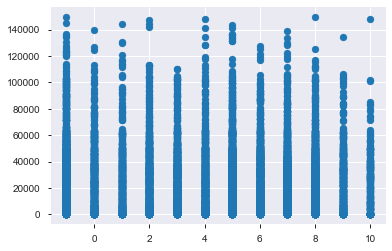

In [1008]:
#f, axes = plt.subplots(1, 1, figsize=(10, 10))
plt.scatter(ds_1['PW130: TRUST IN THE POLITICAL SYSTEM'],ds_1["PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME"])

#f.delaxes(axes[2][3])
plt.show()

In [990]:
ds_1.head()

,PB030: PERSONAL ID,PB010: YEAR OF THE SURVEY,PB140: YEAR OF BIRTH,PE040: HIGHEST ISCED LEVEL ATTAINED,PH010: GENERAL HEALTH,PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION,PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME,PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS,PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS,PY090G++: SOCIAL BENEFITS,...,PD030: Two pairs of properly fitting shoes_2.0,PD030: Two pairs of properly fitting shoes_3.0,PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month_2.0,PD050: Get-together with friends/family (relatives) for a drink/meal at least once a month_3.0,PD060: Regularly participate in a leisure activity_2.0,PD060: Regularly participate in a leisure activity_3.0,PD070: Spend a small amount of money each week on yourself_2.0,PD070: Spend a small amount of money each week on yourself_3.0,PD080: Internet connection for personal use at home_2.0,PD080: Internet connection for personal use at home_3.0
0,35601,2013,1977,3.0,1.0,1.0,37262.33,0,0.0,0.00,...,0,0,0,1,0,0,0,0,0,0
1,44701,2013,1936,2.0,3.0,2.0,0.00,85,0.0,18846.06,...,0,1,0,0,0,0,0,0,0,0
2,59901,2013,1952,5.0,3.0,2.0,0.00,0,0.0,9336.96,...,0,0,0,0,0,0,0,0,0,0
3,71101,2013,1938,2.0,5.0,2.0,0.00,0,0.0,11999.28,...,0,0,0,0,0,1,0,0,0,0
4,79501,2013,1950,3.0,1.0,2.0,23516.66,0,0.0,0.00,...,0,0,1,0,0,0,0,0,0,1


# Machine Learning supervised

# 1. Regression

#### <font color=red>here decide to keep or drop nan: </font>

In [1009]:
data = ds_1[ds_1['PW130: TRUST IN THE POLITICAL SYSTEM']>=0]
#data=ds_1

In [1010]:
XCol=list(data.columns)
XCol.remove('PW130: TRUST IN THE POLITICAL SYSTEM')
YCol=['PW130: TRUST IN THE POLITICAL SYSTEM']

In [973]:
X = data[XCol]
y= data[YCol]

•	imbalance checking (undersampling, oversamplingML umbalanced data lib)

•	Split --> X_tr, y_tr, / X_ts,  y_ts

•	Try few models (with different algorithms) (<-- pipeline)

    –	Initialization

    –	Fit / predict

    –	Evaluation (overfitting / underfitting)

•	Choose best option based on requirements

•	Optimize the model

    –	Cross -validation

    –	Try few models (with same way to approach problem)

        o	Init

        o	Fit.(predict)

        o	Evaluation

    –	Hpyertuning


### 2.1 Test for imbalancing in Y

In [1011]:
YCol

['PW130: TRUST IN THE POLITICAL SYSTEM']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000492C46E61A88>]],
      dtype=object)

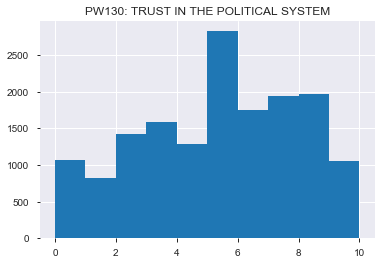

In [1012]:
y.hist()

## it is very imbalanced  --> bin the values bellow 5 and change *dont know" to other value

In [867]:
#y.loc[(y['PW130: TRUST IN THE POLITICAL SYSTEM']==-1), 'PW130: TRUST IN THE POLITICAL SYSTEM']= X

#### <font color=red>here decide how to bin: </font>

In [868]:
#y['bin'] =y['PW130: TRUST IN THE POLITICAL SYSTEM'].apply(lambda x: 4.5 if (x <=5) & (x!=-1) else x)
#y['bin'] =y['bin'].apply(lambda x: 6.5 if ((x ==6) | (x==7)) else x)
#y['bin'].unique()

In [869]:
#y['bin'].hist()


#### <font color=red>here decide to take binned y or not: </font>

In [1013]:
#ytogo=y['bin']
ytogo=y['PW130: TRUST IN THE POLITICAL SYSTEM']
y.head()

,PW130: TRUST IN THE POLITICAL SYSTEM
0,3.0
1,7.0
2,3.0
3,5.0
4,0.0


dset = X
dset['y']=y['PW130: TRUST IN THE POLITICAL SYSTEM']

plt.figure(figsize =(10,10))
corr = dset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, cmap='coolwarm', annot = False, linewidth=0.5, mask=mask)

### 2.2. Scale and split dataset

In [1014]:
### scaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std.shape
X.columns

Index(['PB030: PERSONAL ID', 'PB010: YEAR OF THE SURVEY',
       'PB140: YEAR OF BIRTH', 'PE040: HIGHEST ISCED LEVEL ATTAINED',
       'PH010: GENERAL HEALTH',
       'PH020: SUFFER FROM ANY A CHRONIC (LONG-STANDING) ILLNESS OR CONDITION',
       'PY010G_PY020G_PY021G_PY050G: EMPLOYEE INCOME',
       'PY035G: CONTRIBUTIONS TO INDIVIDUAL PRIVATE PENSION PLANS',
       'PY080G: PENSION FROM INDIVIDUAL PRIVATE PLANS',
       'PY090G++: SOCIAL BENEFITS', 'PB150: SEX_2',
       'PB190: MARITAL STATUS_2.0', 'PB190: MARITAL STATUS_3.0',
       'PB190: MARITAL STATUS_4.0', 'PB190: MARITAL STATUS_5.0',
       'PB200: CONSENSUAL UNION_2', 'PB200: CONSENSUAL UNION_3',
       'PB220A: CITIZENSHIP_1', 'PE010: CURRENT EDUCATION ACTIVITY_2',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_2.0',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_3.0',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_4.0',
       'PL031: SELF-DEFINED CURRENT ECONOMIC STATUS_5.0',
       'PL031: SELF-DEFINED CUR

In [1015]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_minmax = scaler.fit_transform(X)
X_minmax.shape


(15732, 88)

#### <font color=red>here decide to scale x or not and if yes which one: </font>

In [1016]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, ytogo, test_size=0.2)

### 2.3 Try few models (with different algorithms) (<-- pipeline)

#### a) Prepare Model 

In [1017]:
## prepare interaction term
for d in range(2):
    interaction = PolynomialFeatures(degree = d, include_bias = False, interaction_only = True)
    X_inter = interaction.fit_transform(X_train)

#### b)  Linear Regression Model

In [1018]:

lm = LinearRegression()
model = lm.fit(X_train,y_train)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

y_pred  = lm.predict(X_test)


Intercept:  4.908959644360204
Coef:  [ 3.21049103e-02 -1.63243289e+12  2.76040764e-01  1.25550310e-01
 -6.61053574e-02  3.44382970e-03 -4.88961227e-01  5.34910596e-01
  1.12591792e+00  5.10634715e-01  3.57323217e-02  8.01112775e-02
  5.88480396e-02  1.27627771e-01  1.02319130e-01  1.66750095e-02
  6.68825671e-04  6.33745691e-02 -3.04185121e-03 -3.25603410e-02
  7.76023615e-02 -1.28135020e-01 -3.93399408e-02 -3.40573647e-01
 -5.21106335e-02 -1.04377050e-01 -3.26909103e-01  1.15735275e-01
 -8.65702650e-02  1.32296665e-01 -4.09784678e-01 -1.12300216e-01
 -1.06323333e-01 -1.55090332e-01 -5.21697998e-02 -2.11029053e-01
 -1.73400879e-01 -9.05609131e-02 -1.05026245e-01 -1.11236572e-01
  1.42288208e-02 -7.38525391e-02  1.04991913e-01 -2.24689484e-01
 -1.38610840e-01 -1.11877441e-01 -1.30920410e-02 -5.55610657e-03
 -2.35694885e-01 -2.26409912e-01 -1.97862089e-01  6.05545044e-02
 -1.09710693e-02 -5.74645996e-02 -2.89123535e-01 -5.40771484e-02
 -1.19226933e-01  1.02348328e-01  5.77411652e-02 -1.0

In [1019]:
mean_absolute_error(y_test, y_pred)

2.1415950700860913

In [1020]:
mean_squared_error(y_test, y_pred)

6.742333423865221

In [1021]:
r2_score(y_test, y_pred)

-0.005490111958169841

#### c)  Taylor (pipeline)

In [ ]:
#for k in range(1,8):
poly_model = make_pipeline (StandardScaler(), PolynomialFeatures(degree=3, include_bias = False, interaction_only = True), LinearRegression())

model = poly_model.fit(X_train, y_train)

    
print(poly_model.score(X_test, y_test))

y_pred  = poly_model.predict(X_test)


In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

#### c)  Regression Tree

In [ ]:
regr = DecisionTreeRegressor(random_state = 29)

model = regr.fit(X_train, y_train)

y_pred  = regr.predict(X_test)
regr.score(X_test, y_test)

In [ ]:
r = export_text(regr, feature_names=list(X.columns))
#print(r)

In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

In the rare cases you get a negative r squared value, you should probably rethink your regression analysis, especially if you are forcing an intercept.

#### d)  KNeighborsRegressor

In [ ]:
knnr = KNeighborsRegressor(n_neighbors = 3)

model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)


In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

#### <font color=red>huge means squared_error and negative r squared for binned and unbinned y
     also failed with drop nan, but way better!
    also failed with feature elimination

</font>

# 2.2 optimize recursive feature elimination (RFE)

In [ ]:
## recursive feature elimination.
# initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

Fit the model and print the ranking

In [ ]:
# Your code here:
auto_model = LinearRegression()
selector = RFE(auto_model, 5, step=1)
model = selector.fit(X_train,y_train)

In [ ]:
# Your code here:
selector.ranking_
#selector.support_

In [ ]:
columns=[]
for x in range(len(X.columns)):
    if selector.ranking_[x]<=5:
        columns.append(X.columns[x])
print(len(columns))
columns

In [ ]:
X=data[columns]

## --> run 2.2 split and 2.3 models again

## 2.3 PCA

In [ ]:
X = data[XCol]
X.shape

In [ ]:
# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# ica = FastI-CA(n_components=0.99, whit-en=True)

# Conduct PCA
features_pca = pca.fit_transform(X)

In [ ]:
X= features_pca
X.shape
## --> run 2.2 split and 2.3 models again

## 2. Classification

## 2.1 first try

### 2.1.1 prepare data

In [ ]:
# change outcome variable to a 2 classification variable:
# drop 99
# based on ds_1
data = ds_1

data =data[data['PW130: TRUST IN THE POLITICAL SYSTEM']!=-1]
data.shape
ds_1.shape[0]-data.shape[0]

In [ ]:
data['Y_class']= data['PW130: TRUST IN THE POLITICAL SYSTEM'].apply(lambda x: 1 if x>=8 else 0)

In [ ]:
data['Y_class'].hist()
data['Y_class'].value_counts()
## --> balanced more or less

In [ ]:
XCol=data.columns[:-2]
YCol=data.columns[-1]

print(len(XCol))
print(YCol)

In [ ]:
X = data[XCol]
y= data[YCol]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape
X_test.shape


#### a) Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)


y_pred=lr.predict(X_test)

In [ ]:
acc = lr.score(X_test,y_test)
acc

In [ ]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

tn,fp,fn,tp = confusion_matrix(y_test, y_pred).flatten()
### it predicts all as 1...

#### b) DecisionTree Classify

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [ ]:
acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc, 2)}%")

In [ ]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

conf

In [ ]:
## overfitting!!!

#### c) Support Vector Maschine

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
acc = svm.score(X_test,y_test)*100
print(f"SVM Algorithm Test Accuracy {round(acc, 2)}%")

In [ ]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))

#### d) K-Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
acc = knn.score(X_test, y_test)*100
acc

In [ ]:
conf=confusion_matrix(y_test, y_pred)

print( "accuracy: "  + str(round((conf[1,1]+conf[0,0])/ conf.sum()*100,2)))
print( "precision: " +str(round((conf[0,0])/ (conf[1,0]+conf[0,0])*100,2)))


Sammelsurium zum optimieren:
- dummies für social benefits einzelne
- die einzelnen social benefits brauchen
- log from y!